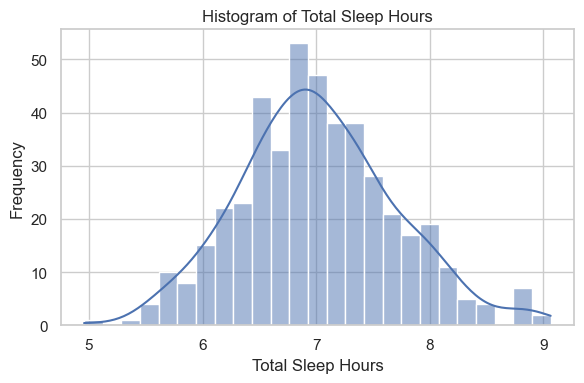

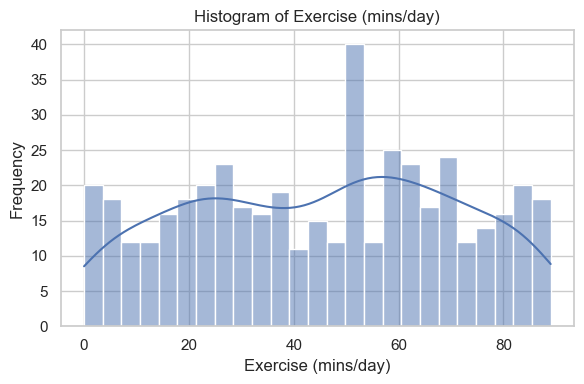

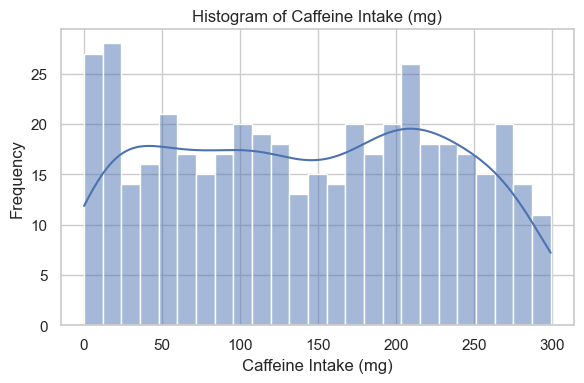

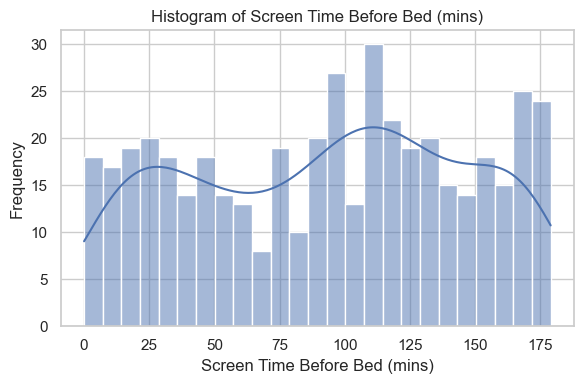

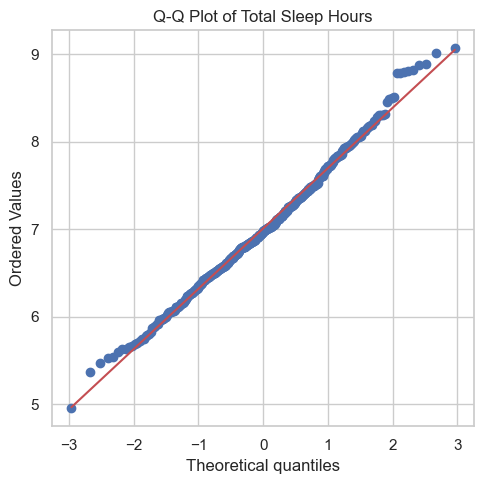

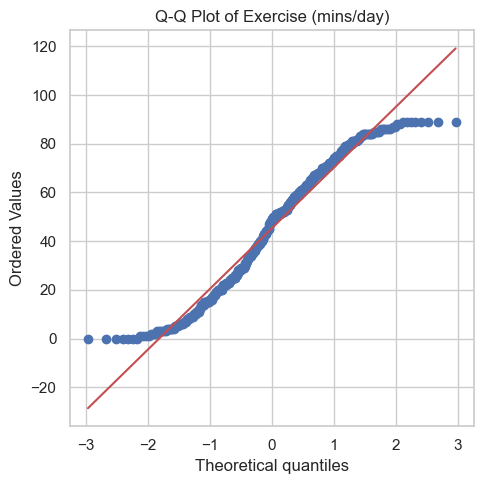

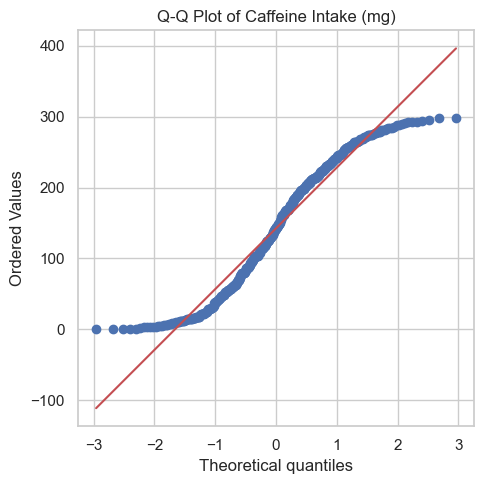

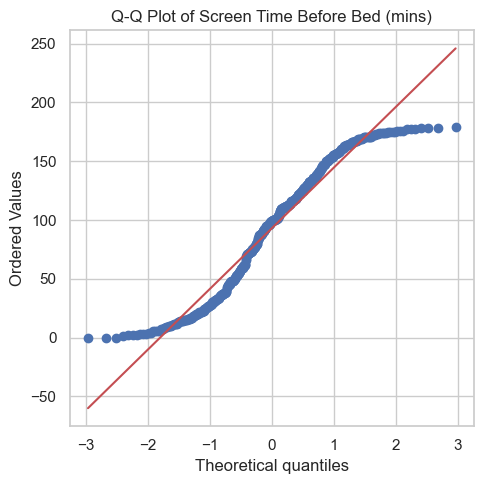

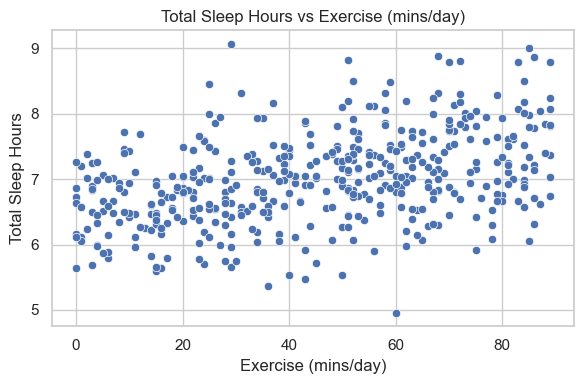

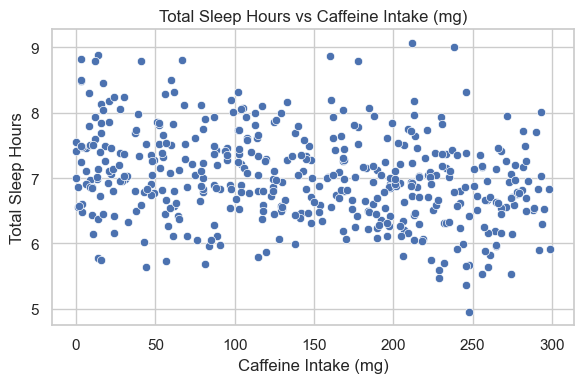

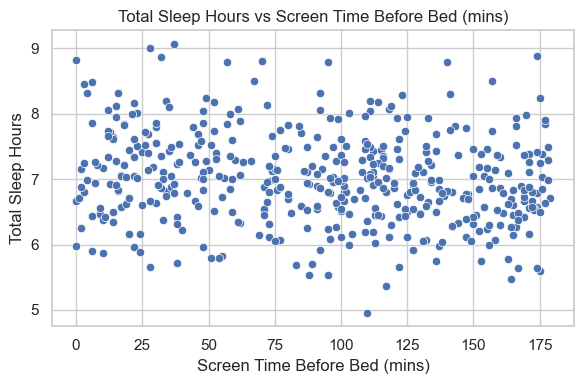

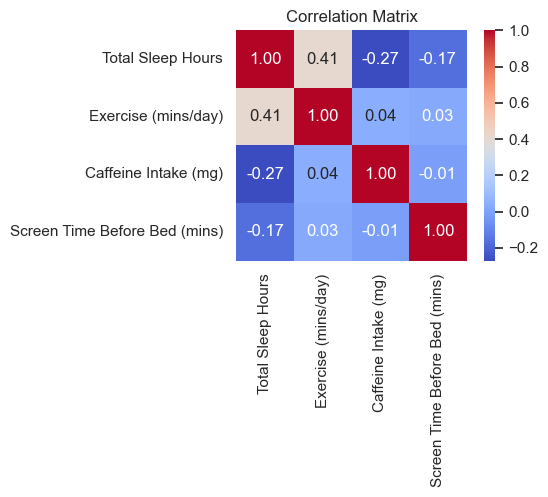

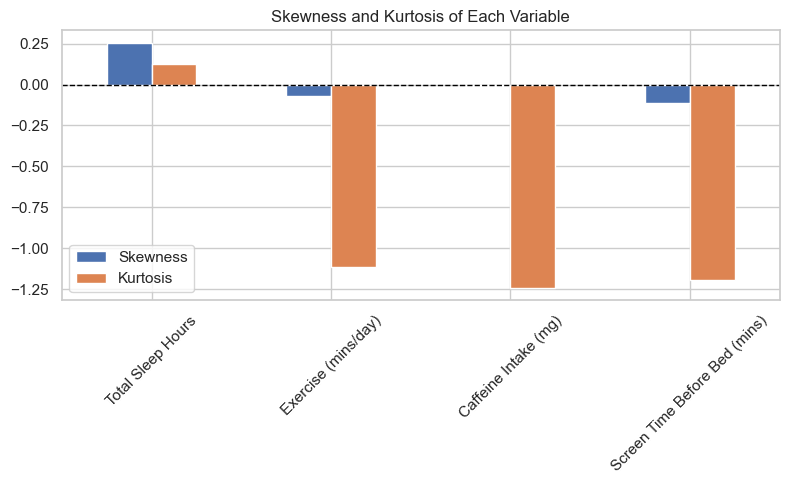

                               Skewness  Kurtosis
Total Sleep Hours                 0.256     0.126
Exercise (mins/day)              -0.070    -1.116
Caffeine Intake (mg)             -0.008    -1.241
Screen Time Before Bed (mins)    -0.110    -1.193


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Load data
df = pd.read_csv("sleep_subset.csv")

# Plot style
sns.set(style="whitegrid")

# ------------------------------
# 1. Histograms
# ------------------------------
variables = df.columns
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True, bins=25)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# ------------------------------
# 2. Q-Q Plots
# ------------------------------
for var in variables:
    plt.figure(figsize=(5, 5))
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    plt.tight_layout()
    plt.show()

# ------------------------------
# 3. Scatter Plots (IVs vs Total Sleep Hours)
# ------------------------------
for var in variables:
    if var != 'Total Sleep Hours':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=var, y='Total Sleep Hours')
        plt.title(f'Total Sleep Hours vs {var}')
        plt.tight_layout()
        plt.show()

# ------------------------------
# 4. Correlation Heatmap
# ------------------------------
corr = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# ------------------------------
# 5. Skewness and Kurtosis Bar Plot
# ------------------------------
skew_vals = df.apply(lambda x: stats.skew(x)).rename("Skewness")
kurt_vals = df.apply(lambda x: stats.kurtosis(x)).rename("Kurtosis")

summary_stats = pd.concat([skew_vals, kurt_vals], axis=1)

# Bar plot
summary_stats.plot(kind='bar', figsize=(8, 5))
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Skewness and Kurtosis of Each Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(summary_stats.round(3))
